# Model 1: Modelling first listing Price


This Notebook contains the modeling of the pricing model for the first Airbnb listing.  It contains the next structure:

* Uploaded Libraries, data set, variable declaration, and data split.
* Feature selection results (the GA rounds are in the notebook ```01_Genetic_algorithm_Airbnb_Model_1```)
* Training and Tuning process.
* Final model.
* Saving predictions for whole data set.

## Libraries

In [35]:
%reload_ext autoreload
%autoreload 2

# visualisation and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 200)


# system and files managment
import os
import sys
import pickle
import ast
import collections

# model splits
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# model
import xgboost as xg

import warnings
warnings.filterwarnings('ignore')

In [36]:
# modules added to system path
path_tools = os.path.abspath(r'/Users/starignus/Documents/Programing/Practise_jobexam/FDA/Airbnb')
sys.path.extend([path_tools])

In [37]:
# exploring tools module
import tools.exploring_tools as mtool 
import tools.feature_selection as fselec
import tools.model_selection as mselec

## Paths

In [38]:
path_project = r'/Users/starignus/Documents/Programing/Practise_jobexam/FDA/'
path_input = os.path.join(path_project, 'Data', 'inputs')
path_ouput = os.path.join(path_project, 'Data', 'outputs')
listings = os.path.join(path_input, 'listings.csv')
data_set = os.path.join(path_input, 'extended_data_set.pickle')

## Upload Data

In [39]:
df = pd.read_pickle(data_set)

## Variables list
The  model is using features just related to the property, the location, and amenities (top 42).

In [40]:
var_set_1 = [
'price_log',
'latitude',
'longitude',
'accommodates',
'bedrooms',
'beds',
'minimum_nights',
'maximum_nights',
'minimum_minimum_nights',
'maximum_minimum_nights',
'minimum_maximum_nights',
'maximum_maximum_nights',
'minimum_nights_avg_ntm',
'maximum_nights_avg_ntm',
'has_availability',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'bathrooms',
'bathrooms_shared',
'number_amenities',
'room_type_num']

var_amenties = ['wifi',
'heating',
'essentials',
'kitchen',
'smoke_alarm',
'washer',
'hangers',
'iron',
'tv',
'hair_dryer',
'shampoo',
'dedicated_workspace',
'carbon_monoxide_alarm',
'hot_water',
'dryer',
'refrigerator',
'dishes_and_silverware',
'cooking_basics',
'oven',
'bed_linens',
'microwave',
'stove',
'fire_extinguisher',
'first_aid_kit',
'private_entrance',
'dishwasher',
'coffee_maker',
'long_term_stays_allowed',
'elevator',
'free_parking_on_premises',
'extra_pillows_and_blankets',
'lock_on_bedroom_door',
'host_greets_you',
'cable_tv',
'luggage_dropoff_allowed',
'patio_or_balcony',
'garden_or_backyard',
'breakfast',
'paid_parking_off_premises',
'lockbox',
'free_street_parking',
'bathtub']

## split data set 

In [41]:
y = df['price_log'].values

In [42]:
X = df[var_set_1[1:] + var_amenties].copy()

In [43]:
X.head()

,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,bathrooms,bathrooms_shared,number_amenities,room_type_num,wifi,heating,essentials,kitchen,smoke_alarm,washer,hangers,iron,tv,hair_dryer,shampoo,dedicated_workspace,carbon_monoxide_alarm,hot_water,dryer,refrigerator,dishes_and_silverware,cooking_basics,oven,bed_linens,microwave,stove,fire_extinguisher,first_aid_kit,private_entrance,dishwasher,coffee_maker,long_term_stays_allowed,elevator,free_parking_on_premises,extra_pillows_and_blankets,lock_on_bedroom_door,host_greets_you,cable_tv,luggage_dropoff_allowed,patio_or_balcony,garden_or_backyard,breakfast,paid_parking_off_premises,lockbox,free_street_parking,bathtub
0,51.46225,-0.11732,4,1.0,3.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,1.0,3,33,63,338,1.0,0.0,28,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51.56802,-0.11121,2,1.0,0.0,1,29,1.0,1.0,29.0,29.0,1.0,29.0,1.0,30,60,90,365,1.0,1.0,41,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,51.48796,-0.16898,2,1.0,1.0,10,50,10.0,10.0,50.0,50.0,10.0,50.0,1.0,29,59,62,189,1.0,0.0,24,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.52195,-0.14094,6,3.0,3.0,4,365,4.0,4.0,365.0,365.0,4.0,365.0,1.0,16,16,16,231,2.0,0.0,27,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,51.47935,-0.19743,2,1.0,1.0,3,21,3.0,3.0,21.0,21.0,3.0,21.0,1.0,29,59,89,364,1.0,0.0,16,2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [45]:
y_train

array([3.33220451, 4.15888308, 4.31748811, ..., 4.38202663, 3.55534806,
       3.09104245])

In [46]:
X_train.shape

(60891, 64)

In [47]:
X_test.shape

(15223, 64)

# Feature selection

Performance of the model with all the variabels avialable to be used.

In [80]:
# Instantiation 
clf = xg.XGBRegressor(objective ='reg:squarederror', 
                      max_depth=3, 
                      n_estimators=100, 
                      random_state=0)

The feature importance measure taken is **gain** which is the average contribution of the feature to the model  across all the trees. A higher value of this metric when compared to another feature implies it is more important for generating a prediction. This metric ease the interpretation of the relative importance of each feature.

The idea of Gain is to account for the improvement in accuracy brought by a feature to the branches it is on. The main idea is that before adding a new split on a feature $x_i$ to the branch there was some wrongly classified elements, after adding the split on this feature, there are two new branches, and each of these branch is more accurate. Meaning that an observation on this branch will be classified as one, and on the other branch the opotite.

There are another importance messures like **weight** that is the number of times a feature is used to split the data across all trees; and **coverage** that is defined as the number of samples/observations affected by the split.

In [13]:
# set importance type to gain rather than default 'split'
clf.set_params(importance_type='gain')

XGBRegressor(objective='reg:squarederror')

In [14]:
clf.fit(X_train, y_train, verbose=True)

XGBRegressor(objective='reg:squarederror')

In [15]:
# Predict the model 
pred = clf.predict(X_test) 

In [59]:
# The  model is using features just related to the property, the location, and amenities.
def RMSE(y_true, y_pred):
    return np.sqrt(MSE(y_true, y_pred))

In [17]:
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse))

RMSE :  0.400235


In [18]:
# error in the unts of £ since we did a log transformation of the price to model it
np.exp(0.400235)

1.4921753176414525

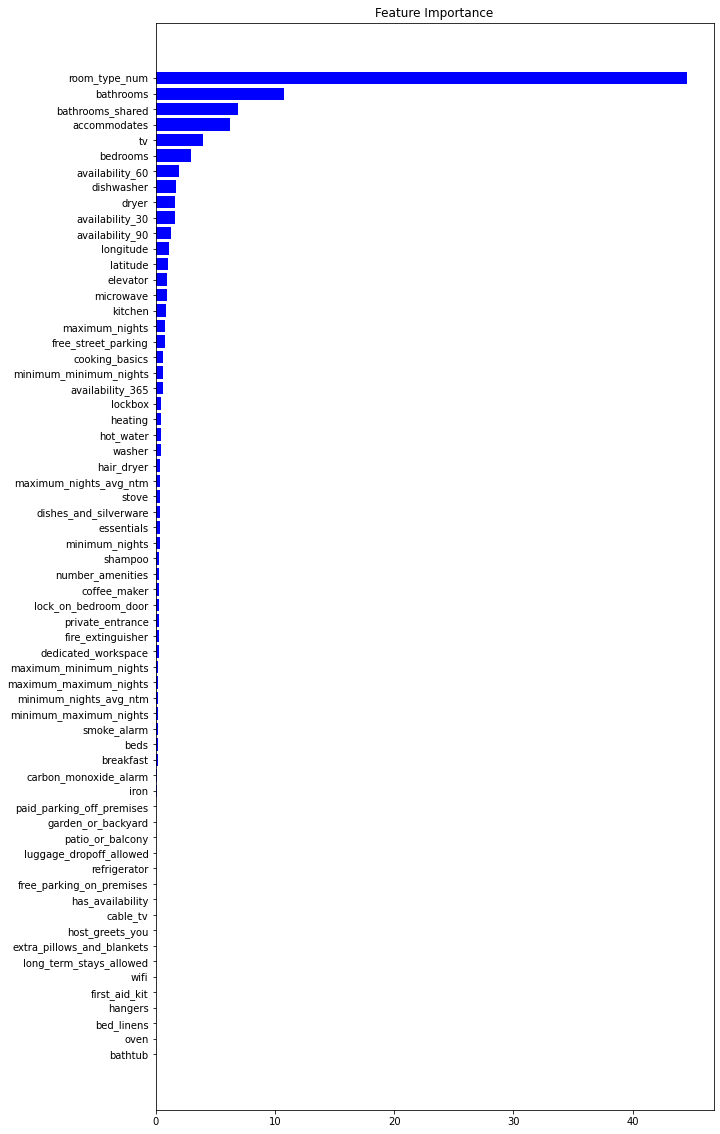

In [19]:
df_feat_import_1 = fselec.feature_importance(clf, model_type='Uncalibrated', feature_list=list(X_train.columns))

In [20]:
df_feat_import_1.head(25)

,Feature_importance%
room_type_num,44.551601
bathrooms,10.771441
bathrooms_shared,6.925835
accommodates,6.229731
tv,3.979994
bedrooms,2.972055
availability_60,1.982256
dishwasher,1.748774
dryer,1.629311
availability_30,1.620284


Evaluation run when fitting the model:

In [78]:
eval_set = [(X_train, y_train), (X_test, y_test)] 

In [81]:
clf.fit(X_train, y_train, eval_metric=["rmse", "mae"], eval_set=eval_set, verbose=False)

XGBRegressor(objective='reg:squarederror')

In [82]:
# Predict the model 
pred_1 = clf.predict(X_test) 

In [83]:
# evaluating prediction
rmse_1 = RMSE(y_test, pred_1)

In [85]:
rmse_1

0.40023450030435226

In [26]:
# reported in table
np.exp(rmse_1)

1.4921745720081268

In [27]:
# retrieve performance metrics
results = clf.evals_result()

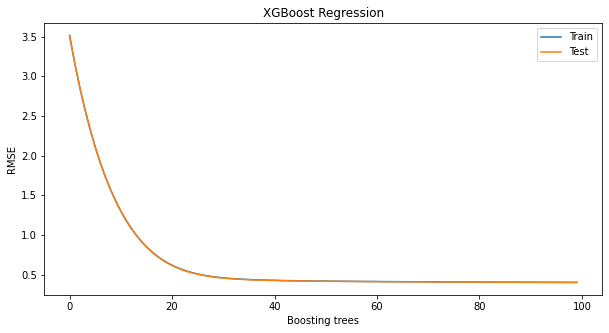

In [28]:
fselec.xgboost_learning_curve(results)

Running to test adding an early stop to the boosting rounds.

In [29]:
# Instantiation 
clf_test = xg.XGBRegressor(objective ='reg:squarederror', 
                      max_depth=2, 
                      n_estimators=50, 
                      random_state=0)

In [30]:
# set importance type to gain rather than default 'split'
clf_test.set_params(importance_type='gain')

XGBRegressor(max_depth=2, n_estimators=50, objective='reg:squarederror')

In [31]:
clf_test.fit(X_train, y_train, eval_metric=["rmse"], eval_set=eval_set, early_stopping_rounds=40, verbose=False)

XGBRegressor(max_depth=2, n_estimators=50, objective='reg:squarederror')

In [32]:
# Predict the model 
pred_1 = clf_test.predict(X_test, ntree_limit=clf_test.best_ntree_limit) 
pred_1

array([4.632261 , 4.055711 , 4.1891146, ..., 3.6586137, 4.018154 ,
       3.592351 ], dtype=float32)

In [33]:
pred_1 = clf_test.predict(X_test) 
pred_1

array([4.632261 , 4.055711 , 4.1891146, ..., 3.6586137, 4.018154 ,
       3.592351 ], dtype=float32)

In [34]:
# evaluating prediction
rmse_1_2 = RMSE(y_test, pred_1)

In [35]:
rmse_1_2

0.431931152084622

In [137]:
np.exp(0.43193)

1.5402272954767986

In [36]:
# retrieve performance metrics
results = clf_test.evals_result()

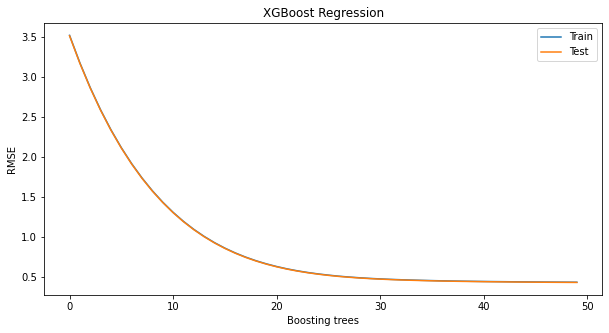

In [37]:
fselec.xgboost_learning_curve(results)

## Genetic algorithm results.
From the notebook where the GA algorithm was run, the best varaibles found were:

In [86]:
list_var_GA = ['latitude', 'longitude', 'accommodates', 'bedrooms', 'maximum_nights',
       'availability_30', 'bathrooms_shared', 'room_type_num', 'tv',
       'hot_water', 'dishwasher', 'cable_tv']

Traing now a model with the best features from GA.

In [87]:
clf_2 = xg.XGBRegressor(objective ='reg:squarederror', 
                        max_depth=3, 
                        n_estimators=100, 
                        random_state=0)

In [88]:
# set importance type to gain rather than default 'split'
clf_2.set_params(importance_type='gain')

XGBRegressor(objective='reg:squarederror')

In [89]:
eval_set_2 = [(X_train[list_var_GA], y_train), (X_test[list_var_GA], y_test)] 

In [90]:
clf_2.fit(X_train[list_var_GA], y_train, eval_set=eval_set_2)

[0]	validation_0-rmse:3.51505	validation_1-rmse:3.50868
[1]	validation_0-rmse:3.17052	validation_1-rmse:3.16444
[2]	validation_0-rmse:2.86126	validation_1-rmse:2.85545
[3]	validation_0-rmse:2.58363	validation_1-rmse:2.57816
[4]	validation_0-rmse:2.33458	validation_1-rmse:2.32933
[5]	validation_0-rmse:2.11139	validation_1-rmse:2.10635
[6]	validation_0-rmse:1.91143	validation_1-rmse:1.90651
[7]	validation_0-rmse:1.73255	validation_1-rmse:1.72777
[8]	validation_0-rmse:1.57269	validation_1-rmse:1.56809
[9]	validation_0-rmse:1.43008	validation_1-rmse:1.42569
[10]	validation_0-rmse:1.30289	validation_1-rmse:1.29867
[11]	validation_0-rmse:1.18976	validation_1-rmse:1.18565
[12]	validation_0-rmse:1.08942	validation_1-rmse:1.08545
[13]	validation_0-rmse:1.00072	validation_1-rmse:0.997136
[14]	validation_0-rmse:0.922404	validation_1-rmse:0.918872
[15]	validation_0-rmse:0.853542	validation_1-rmse:0.850157
[16]	validation_0-rmse:0.793233	validation_1-rmse:0.78992
[17]	validation_0-rmse:0.74056	vali

XGBRegressor(objective='reg:squarederror')

In [91]:
X_train[list_var_GA].shape

(60891, 12)

In [92]:
X_test[list_var_GA].shape

(15223, 12)

In [93]:
# Predict the model 
pred_2 = clf_2.predict(X_test[list_var_GA]) 

In [94]:
# RMSE Computation 
rmse_2 = RMSE(y_test, pred_2) 
print("RMSE : % .4f" %(rmse_2))

RMSE :  0.4103


In [95]:
np.exp(rmse_2)

1.5072091504823253

In [96]:
# The performance of the model with the selected varibles 
# has a relaive relative 2.5% uplift w.r.t the model with all the variables. 
print("Change in performance", rmse_2 - rmse_1)
print("Change in %", ((rmse_2 - rmse_1) / rmse_1) * 100)

Change in performance 0.010025195697066447
Change in % 2.5048304655003353


In [97]:
# Looking in £ units
# The performance of the model with the selected varibles 
# has a relaive relative 1% uplift w.r.t the model with all the variables. 
print("Change in performance £", np.exp(rmse_2) - np.exp(rmse_1))
print("Change in %", (np.exp(rmse_2) - np.exp(rmse_1))/np.exp(rmse_1) * 100)

Change in performance £ 0.015034578474198534
Change in % 1.0075616322804255


In [98]:
# retrieve performance metrics
results_2 = clf_2.evals_result()

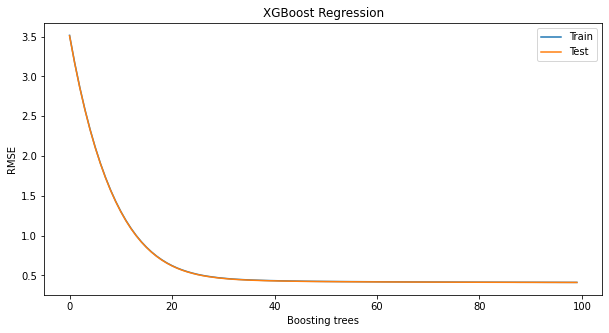

In [99]:
fselec.xgboost_learning_curve(results_2)

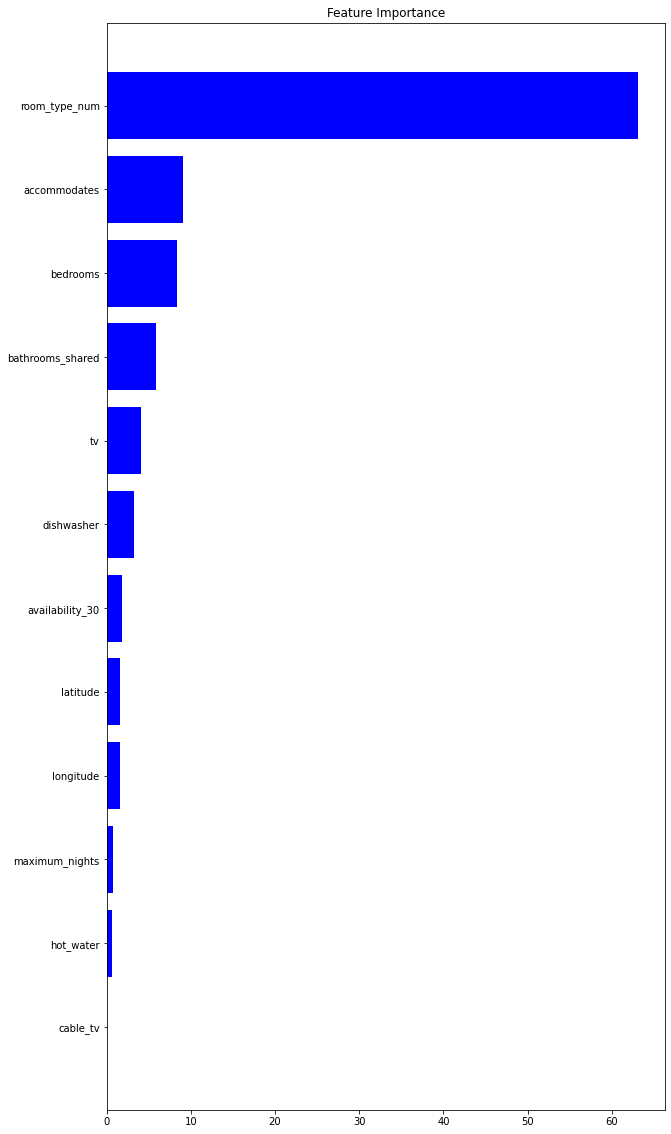

In [100]:
df_feat_import_2 = fselec.feature_importance(clf_2, model_type='Uncalibrated', feature_list=list_var_GA)

In [101]:
# We can still see from here 
df_feat_import_2

,Feature_importance%
room_type_num,63.133419
accommodates,9.053519
bedrooms,8.388864
bathrooms_shared,5.873417
tv,4.094971
dishwasher,3.219708
availability_30,1.831721
latitude,1.538228
longitude,1.521373
maximum_nights,0.719187


In [8]:
corr_spear_2 = df[list_var_GA + ['price_log']].corr(method='spearman').abs()

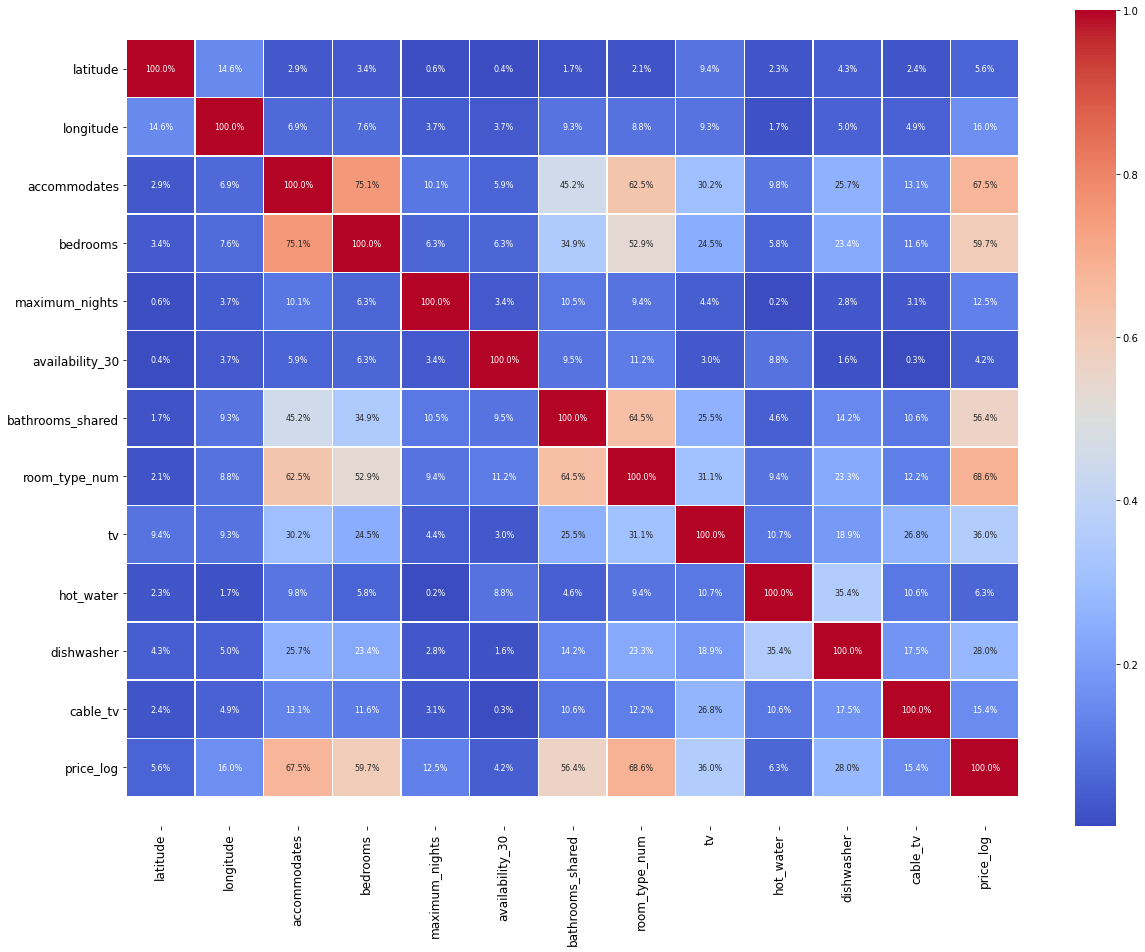

In [9]:
mtool.heat_map_corr(corr_spear_2, cmap='coolwarm', square=False, annot=True)

To quantfiy the imporvement in perfomrance in our different rounds, including the feature selection process and parameter tunning,a base line model will be biuld. To keep things simple the base line model predicts that the best price is the the mean value of our training set.

In [102]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions_0 = np.ones(y_test.shape) * mean_train

In [103]:
# Compute RMSE
rmse_baseline = RMSE(y_test, baseline_predictions_0)
print("Baseline RMSE is {:.4f}".format(rmse_baseline))

Baseline RMSE is 0.7305


In [104]:
np.exp(rmse_baseline)

2.0760583573459903

The model with the GA coming from our feature selection has a smaller error. 

In [105]:
# The performance of the XGB model has a 43.8% relative uplift w.r.t the base line 
print("Change in performance", rmse_2 - rmse_baseline)
print("Change in %", ((rmse_2 - rmse_baseline) / rmse_baseline) * 100)

Change in performance -0.3202113793820787
Change in % -43.83628458032616


In [106]:
# Looking in £ units
# The performance of the XGB model has a 27.4% relative uplift w.r.t the base line
print("Change in performance £", np.exp(rmse_2) - np.exp(rmse_baseline))
print("Change in %", (np.exp(rmse_2) - np.exp(rmse_baseline))/np.exp(rmse_baseline) * 100)

Change in performance £ -0.568849206863665
Change in % -27.40044396395848


# Training and tunning

Some of the parameters of XGboost have different name as the ones used in skleanr. But since XGboost module in python has an sklearn wrapper it uses sklearn style naming convention too. The parameters names which will change are:

* ```eta``` –> ```learning_rate```
* ```lambda``` –> ```reg_lambda```
* ```alpha``` –> ```reg_alpha```


In sklern style we have as well ```n_estimators``` parameter in GBM. Well this exists as a parameter in XGBClassifier and XGBRegressor. Sometimes is called ```num_boosting_rounds```[(Ref 1)](https://xgboost.readthedocs.io/en/latest/python/python_api.html), [(Ref 2)](https://xgboost.readthedocs.io/en/latest/parameter.html).

In [22]:
# starting with parameters of the model with 14 variables
params = {
    # Parameters to tune.
    'max_depth':3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'learnig_rate':0.1,
    'reg_lambda':1,
    # Other parameters
    'objective':'reg:squarederror',
    'random_state':0,
    'eval_metric': 'rmse',
    'importance_type':'gain'
}

Before tunning the parameters in the dictionary, first I will look how to get the number of boosters or estimators to build. ```n_estimators``` is the same ```num_boost_round```. Its optimal value highly depends on the other parameters, and thus it should be re-tuned each time you update a parameter. You could do this by tuning it together with all parameters in a grid-search, but it requires a lot of computational effort.

Tehrefore, it can be used the method of XGBoost that provides a good way to find the best number of estimators whilst training. In XGboost, the trees are built sequentially instead of fixing the number of rounds at the beginning, the model can be test at each step and see if adding a new tree/round improves performance.

```num_boost_round``` are the maximum number of trees or boosting rounds that will be allowed. So it can be set to a large number hoping to find the optimal number before reaching it. If we find it has not improved the performance on the test set, it can be used the ```early_stopping_round rounds``` to stop the training and keep the best number of boosting rounds. If we set up to 10, it means that from a current point of evaluation, it will continue 10 more times and asses if there is still significative improvement by addding more trees. If that is not the case, when ending the 10 round it will stop.

Here I explore first how it will be used to train the model once the parameters are tuned, so the best numbers of rounds or booster are found.

In [61]:
num_boost_round = 999

In [21]:
dtrain = xg.DMatrix(X_train[list_var_GA], label=y_train)
dtest = xg.DMatrix(X_test[list_var_GA], label=y_test)

In [63]:
model_0 = xg.train(params,
                    dtrain,
                    num_boost_round=num_boost_round,
                    evals=[(dtest, "Test")],
                    early_stopping_rounds=10)

[0]	Test-rmse:2.74489
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:1.95081
[2]	Test-rmse:1.40512
[3]	Test-rmse:1.03776
[4]	Test-rmse:0.795899
[5]	Test-rmse:0.643602
[6]	Test-rmse:0.550792
[7]	Test-rmse:0.497682
[8]	Test-rmse:0.467586
[9]	Test-rmse:0.448465
[10]	Test-rmse:0.438903
[11]	Test-rmse:0.433401
[12]	Test-rmse:0.429688
[13]	Test-rmse:0.426105
[14]	Test-rmse:0.424406
[15]	Test-rmse:0.422271
[16]	Test-rmse:0.421051
[17]	Test-rmse:0.419356
[18]	Test-rmse:0.41857
[19]	Test-rmse:0.417487
[20]	Test-rmse:0.4168
[21]	Test-rmse:0.415734
[22]	Test-rmse:0.415192
[23]	Test-rmse:0.414648
[24]	Test-rmse:0.413736
[25]	Test-rmse:0.413123
[26]	Test-rmse:0.413025
[27]	Test-rmse:0.412622
[28]	Test-rmse:0.412346
[29]	Test-rmse:0.411782
[30]	Test-rmse:0.411285
[31]	Test-rmse:0.411117
[32]	Test-rmse:0.410752
[33]	Test-rmse:0.410614
[34]	Test-rmse:0.410533
[35]	Test-rmse:0.410409
[36]	Test-rmse:0.409939
[37]	Test-rmse:0.409616
[38]	Test-rmse:0.409432
[39]	Test-rmse:0.409348


In [64]:
print("Best RMSE: {:.4f} with {} rounds".format(
                 model_0.best_score,
                 model_0.best_iteration + 1))

Best RMSE: 0.3991 with 272 rounds


In [65]:
### If early stop happens
model_0.best_ntree_limit

272

The model with the defined parameters was trained with more rounds than optimal, and the RMSE is about 0.3991

```ntree_limit```is an integer number that limits the number of trees in the prediction; defaults to ```best_ntree_limit``` if defined (i.e. it has been trained with early stopping), otherwise 0 (use all trees).

In [66]:
# model prediction given the trees it was trained on
pred_model_0 = model_0.predict(dtest, ntree_limit=model_0.best_ntree_limit) 
pred_model_0

array([4.8905153, 4.1272764, 3.8595452, ..., 3.561665 , 4.036723 ,
       3.618933 ], dtype=float32)

In [67]:
# Compute RMSE
rmse_untuned = RMSE(y_test, pred_model_0)
print("RMSE is {:.4f}".format(rmse_untuned))

RMSE is 0.3991


In [68]:
np.exp(rmse_untuned)

1.4905516241239225

In [69]:
# If we do not provide the best_ntree_limit it will use all the trees
pred_model_0_f = model_0.predict(dtest) 
pred_model_0_f

array([4.88933  , 4.126551 , 3.8708925, ..., 3.5660264, 4.038771 ,
       3.6133492], dtype=float32)

In [70]:
# Compute RMSE
rmse_untuned_f = RMSE(y_test, pred_model_0_f)
print("Baseline RMSE is {:.4f}".format(rmse_untuned_f))

Baseline RMSE is 0.3992


In [71]:
np.exp(rmse_untuned_f)

1.490594012957888

In [72]:
cv_results_0 = xg.cv(params, 
                      dtrain,
                      num_boost_round=num_boost_round,
                      seed=42,
                      nfold=5,
                      metrics={'rmse'},
                      early_stopping_rounds=10)

In [73]:
cv_results_0.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.750812,0.001594,2.750791,0.008484
1,1.955832,0.001240,1.955748,0.008203
2,1.409908,0.001142,1.409913,0.008322
3,1.041586,0.001185,1.041706,0.008407
4,0.799326,0.001176,0.799528,0.008605


In [74]:
cv_results_0.shape

(264, 4)

In [75]:
cv_results_0['test-rmse-mean'].argmin()

263

train-rmse-mean 0.3863628
test-rmse-mean 0.40335299999999996
train-rmse-std 0.0011180484068232422
test-rmse-std 0.0059536744754815065


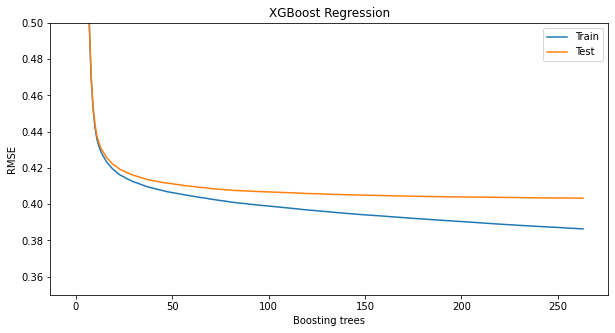

In [76]:
fselec.xgboost_learning_curve(cv_results_0, 
                              train_label='train-rmse-mean',
                              test_label='test-rmse-mean',
                              std_col=['train-rmse-std', 'test-rmse-std'],
                              y_lim=[0.35, 0.5]
                             )

With the current parameters we can see that as the number of bossters increases the variance or overfit occures since the corss validation error gets larger than the training error. So having fewer trees, leads to higher bias or underfittin. That is that the cross validating error is aproximatley equal to the training error.

If we were having infinite resources and not time constrains, a full grid search could be run with all the parameters together and find the optimal solution. It requires a lot of computational effort and we could find one model that could be closer to that optimal one that gives enough performance for our porpouse.

## Tuning the parameters that constraint the architecture or complexity of the trees: 
* ```max_depth``` is the maximum number of nodes allowed from the root to the last leaf of a tree. The deeper a tree is, the more it can model more complex relationships by adding more nodes. But if we go deeper, the splits become less relevant and are sometimes only due to noise, causing the model to overfit.

* ```min_child_weight``` is the number of samples (if all samples have a weight=1) required so it can be created a new node in the tree. When ```min_child_weight``` is small, it allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit (the children are learnig from few examples, therefore overfits).

Therefore, it is important to tune them together in order to find a good trade-off between model bias and variance
The following list contains all the combinations of both parameters to try.

In [77]:
gridsearch_params_complx = [(max_depth, min_child_weight) 
                            for max_depth in range(2,6)
                            for min_child_weight in range(1,7)]

In [78]:
len(gridsearch_params_complx)

24

In [79]:
min_test_err, min_train_err, boost_rounds = mselec.grid_search(gridsearch_params=gridsearch_params_complx,
                                                                orignal_params=params,
                                                                param_list_name=['max_depth', 'min_child_weight'],
                                                                dtrain=dtrain,
                                                                num_boost_round=num_boost_round,
                                                                seed=42,
                                                                nfold=5,
                                                                metrics={'rmse'},
                                                                early_stopping_rounds=10)

CV for max_depth=2 and min_child_weight=1
\RMSE 0.4066362 for 404 rounds
CV for max_depth=2 and min_child_weight=2
\RMSE 0.40588940000000007 for 574 rounds
CV for max_depth=2 and min_child_weight=3
\RMSE 0.4060804 for 508 rounds
CV for max_depth=2 and min_child_weight=4
\RMSE 0.40682159999999995 for 415 rounds
CV for max_depth=2 and min_child_weight=5
\RMSE 0.4061818 for 489 rounds
CV for max_depth=2 and min_child_weight=6
\RMSE 0.405888 for 531 rounds
CV for max_depth=3 and min_child_weight=1
\RMSE 0.40335299999999996 for 264 rounds
CV for max_depth=3 and min_child_weight=2
\RMSE 0.40279419999999994 for 307 rounds
CV for max_depth=3 and min_child_weight=3
\RMSE 0.4022956 for 387 rounds
CV for max_depth=3 and min_child_weight=4
\RMSE 0.4023975999999999 for 388 rounds
CV for max_depth=3 and min_child_weight=5
\RMSE 0.40241699999999997 for 354 rounds
CV for max_depth=3 and min_child_weight=6
\RMSE 0.4026708 for 322 rounds
CV for max_depth=4 and min_child_weight=1
\RMSE 0.4025147999999999

44 minutes execution time

We get the best score with a max_depth of 5 and min_child_weight of 6, so let's update the params

In [80]:
# updating the dicitonary with the optimal values found 
params['max_depth'] = 5
params['min_child_weight'] = 1

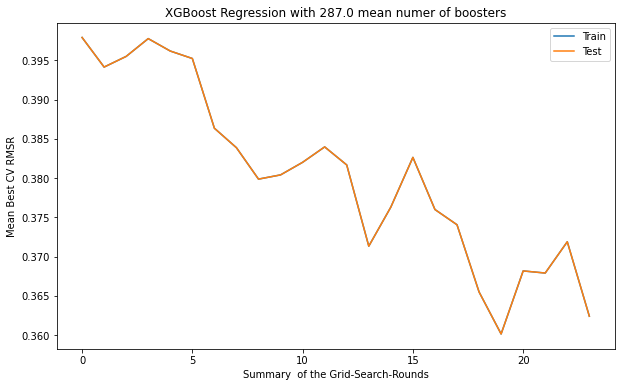

In [81]:
# I my remove this, I am just checking 
mselec.grid_search_rounds(min_test_err, min_train_err, boost_rounds, y_limit=None)

## Tuning the parameters that control the sampling of the data set at each boosting round. 

What they do is that instead of allowing the whole data set to be used at every round, it builds a tree on slightly different data at each step. This approach is followed since it makes it less likely to overfit to a single sample or feature.

* ```subsample``` is the fraction of observations or rows to subsample at each step.The default is set to 1 meaning that is using the whole observations or rows.

* ```colsample_bytree``` is fraction of features/variables/columns to be used. The default is set to 1 meaning that is using all features.


In [82]:
gridsearch_params = [(subsample, colsample)
                    for subsample in [i/10. for i in range(5,11)]
                    for colsample in [i/10. for i in range(5,11)]
                    ]

In [83]:
len(gridsearch_params)

36

In [84]:
min_test_err_2, min_train_err_2, boost_rounds_2 = mselec.grid_search(gridsearch_params=gridsearch_params,
                                                                orignal_params=params,
                                                                param_list_name=['subsample', 'colsample_bytree'],
                                                                dtrain=dtrain,
                                                                num_boost_round=num_boost_round,
                                                                seed=42,
                                                                nfold=5,
                                                                metrics={'rmse'},
                                                                early_stopping_rounds=10)

CV for subsample=0.5 and colsample_bytree=0.5
\RMSE 0.4042236 for 91 rounds
CV for subsample=0.5 and colsample_bytree=0.6
\RMSE 0.4038746 for 91 rounds
CV for subsample=0.5 and colsample_bytree=0.7
\RMSE 0.4033848 for 104 rounds
CV for subsample=0.5 and colsample_bytree=0.8
\RMSE 0.40277320000000005 for 103 rounds
CV for subsample=0.5 and colsample_bytree=0.9
\RMSE 0.4028866000000001 for 124 rounds
CV for subsample=0.5 and colsample_bytree=1.0
\RMSE 0.403868 for 92 rounds
CV for subsample=0.6 and colsample_bytree=0.5
\RMSE 0.40337900000000004 for 90 rounds
CV for subsample=0.6 and colsample_bytree=0.6
\RMSE 0.402278 for 129 rounds
CV for subsample=0.6 and colsample_bytree=0.7
\RMSE 0.40259999999999996 for 113 rounds
CV for subsample=0.6 and colsample_bytree=0.8
\RMSE 0.403024 for 135 rounds
CV for subsample=0.6 and colsample_bytree=0.9
\RMSE 0.402397 for 80 rounds
CV for subsample=0.6 and colsample_bytree=1.0
\RMSE 0.40250139999999995 for 113 rounds
CV for subsample=0.7 and colsample_b

We get the best parameters are subsample = 1.0, colsample_bytree = 1.0, so let's update the params.

In [85]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

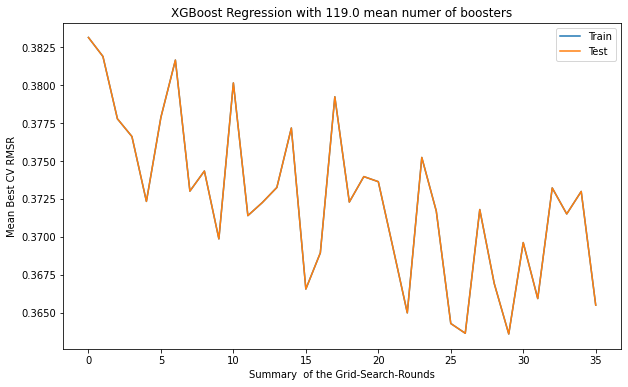

In [86]:
# I my remove this, I am just checking the path of the search
mselec.grid_search_rounds(min_test_err_2, min_train_err_2, boost_rounds_2, y_limit=None)

## Tuning the parameters that controls the learning and model regularisation

* ```eta``` alias ```learning_rate``` controls the shrinkage of the weights associated to features after each round, in other words it defines the amount of "correction" we make at each gradient descendetn step. Remember that that at each boosting round is correcting the errors of previous rounds. So having a small value of this parameter makes our model more robust to overfitting, so the smaller it is the most conservative it becomes. But the price to pay is to to increase the number of boosting rounds which takes more time to train, and sometimes without acheving great improvements.


* ```reg_lambda```L2 regularization term on weights. Increasing this value will make model more conservative to avoid overfitting.

In [87]:
learning_rate_val = [.2, .1, .05, .01, .005]

In [88]:
reag_lambda_val = [1e-5, 1e-2, 0.1, 1, 20]

In [89]:
gridsearch_params = [(learning_rate, reg_lambda)
                    for learning_rate in learning_rate_val
                    for reg_lambda in reag_lambda_val
                    ]

In [90]:
len(gridsearch_params)

25

In [91]:
min_test_err_3, min_train_err_3, boost_rounds_3 = mselec.grid_search(gridsearch_params=gridsearch_params,
                                                                orignal_params=params,
                                                                param_list_name=['learning_rate', 'reg_lambda'],
                                                                dtrain=dtrain,
                                                                num_boost_round=num_boost_round,
                                                                seed=42,
                                                                nfold=5,
                                                                metrics={'rmse'},
                                                                early_stopping_rounds=10)

CV for learning_rate=0.2 and reg_lambda=1e-05
\RMSE 0.399609 for 183 rounds
CV for learning_rate=0.2 and reg_lambda=0.01
\RMSE 0.3999272 for 146 rounds
CV for learning_rate=0.2 and reg_lambda=0.1
\RMSE 0.3993626 for 155 rounds
CV for learning_rate=0.2 and reg_lambda=1
\RMSE 0.3988758 for 228 rounds
CV for learning_rate=0.2 and reg_lambda=20
\RMSE 0.397713 for 297 rounds
CV for learning_rate=0.1 and reg_lambda=1e-05
\RMSE 0.3983094 for 375 rounds
CV for learning_rate=0.1 and reg_lambda=0.01
\RMSE 0.3987736 for 355 rounds
CV for learning_rate=0.1 and reg_lambda=0.1
\RMSE 0.39831159999999993 for 410 rounds
CV for learning_rate=0.1 and reg_lambda=1
\RMSE 0.39802299999999996 for 454 rounds
CV for learning_rate=0.1 and reg_lambda=20
\RMSE 0.3966082 for 804 rounds
CV for learning_rate=0.05 and reg_lambda=1e-05
\RMSE 0.3987512 for 605 rounds
CV for learning_rate=0.05 and reg_lambda=0.01
\RMSE 0.3983286 for 683 rounds
CV for learning_rate=0.05 and reg_lambda=0.1
\RMSE 0.39853820000000006 for 65

In [95]:
params['learning_rate'] = 0.1
params['reg_lambda'] = 20

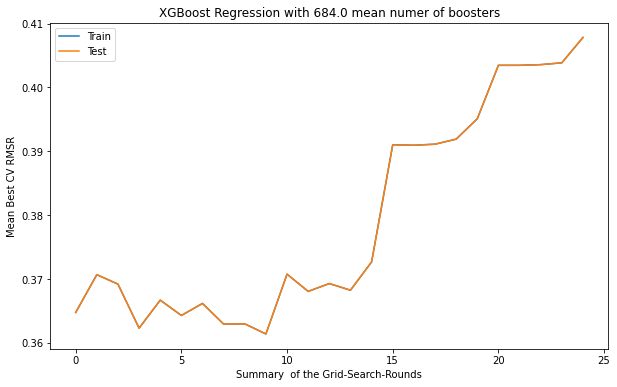

In [92]:
# I my remove this, I am just checking the path of the search
mselec.grid_search_rounds(min_test_err_3, min_train_err_3, boost_rounds_3, y_limit=None)

In [48]:
params_final = {'max_depth': 5,
                 'min_child_weight': 1,
                 'subsample': 1.0,
                 'colsample_bytree': 1.0,
                 'learnig_rate': 0.1,
                 'reg_lambda': 20,
                 'objective': 'reg:squarederror',
                 'random_state': 0,
                 'eval_metric': 'rmse',
                 'importance_type': 'gain'}

## Training  the model

Finding the optimal  value of ```num_boost_round optimal``` highly depends on the other parameters, and thus it should be re-tuned each time you update a parameter. In the CV we did something similar for finding the best other parameters, but now that we have the final set, it is the turn to find the optimal number of boosters. Let's see how much we improve our base line score, and the one from the untune model.


In [53]:
model_1 = xg.train(params_final,
                    dtrain,
                    num_boost_round=num_boost_round,
                    evals=[(dtest, "Test")],
                    early_stopping_rounds=10)

[0]	Test-rmse:2.74791
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:1.95537
[2]	Test-rmse:1.40953
[3]	Test-rmse:1.04001
[4]	Test-rmse:0.794114
[5]	Test-rmse:0.637076
[6]	Test-rmse:0.541455
[7]	Test-rmse:0.486069
[8]	Test-rmse:0.454121
[9]	Test-rmse:0.435344
[10]	Test-rmse:0.425524
[11]	Test-rmse:0.419978
[12]	Test-rmse:0.416386
[13]	Test-rmse:0.414111
[14]	Test-rmse:0.411829
[15]	Test-rmse:0.410443
[16]	Test-rmse:0.409484
[17]	Test-rmse:0.408669
[18]	Test-rmse:0.407895
[19]	Test-rmse:0.407044
[20]	Test-rmse:0.406658
[21]	Test-rmse:0.405803
[22]	Test-rmse:0.405533
[23]	Test-rmse:0.405123
[24]	Test-rmse:0.404377
[25]	Test-rmse:0.404251
[26]	Test-rmse:0.403673
[27]	Test-rmse:0.403502
[28]	Test-rmse:0.403083
[29]	Test-rmse:0.402484
[30]	Test-rmse:0.402313
[31]	Test-rmse:0.402145
[32]	Test-rmse:0.40151
[33]	Test-rmse:0.401314
[34]	Test-rmse:0.401221
[35]	Test-rmse:0.401031
[36]	Test-rmse:0.400997
[37]	Test-rmse:0.400582
[38]	Test-rmse:0.400586
[39]	Test-rmse:0.40057

In [54]:
print("Best RMSE: {:.4f} with {} rounds".format(
                 model_1.best_score,
                 model_1.best_iteration + 1))

Best RMSE: 0.3941 with 184 rounds


In [55]:
# If early stop happens
model_1.best_ntree_limit

184

```ntree_limit```is an integer number that limits the number of trees in the prediction; defaults to ```best_ntree_limit``` if defined (i.e. it has been trained with early stopping), otherwise 0 (use all trees).

In [58]:
# model prediction given the trees it was trained on
pred_model_1 = model_1.predict(dtest, ntree_limit=model_1.best_ntree_limit) 
pred_model_1

array([4.896048 , 4.0409336, 3.9564116, ..., 3.5128784, 4.1208677,
       3.6433213], dtype=float32)

In [60]:
# Compute v
rmse_tuned = RMSE(y_test, pred_model_1)
print("Tuned before num_bust_dound and limit the trees for early stop RMSE is {:.4f}".format(rmse_tuned))

Tuned before num_bust_dound and limit the trees for early stop RMSE is 0.3941


In [61]:
np.exp(rmse_tuned)

1.4831043030503794

In [63]:
# If we do not provide the best_ntree_limit it will use all the trees
pred_model_1_f = model_1.predict(dtest) 
pred_model_1_f

array([4.8958035, 4.0410132, 3.9656672, ..., 3.514044 , 4.1213136,
       3.6439207], dtype=float32)

In [64]:
# Compute RMSE
rmse_tuned_f = RMSE(y_test, pred_model_1_f)
print("Tuned before num_bust_dound and full trees RMSE is {:.4f}".format(rmse_tuned_f))

Tuned before num_bust_dound and full trees RMSE is 0.3943


In [65]:
np.exp(rmse_tuned_f)

1.4832926159961066

In [66]:
cv_results_f = xg.cv(params_final, 
                      dtrain,
                      num_boost_round=num_boost_round,
                      seed=42,
                      nfold=5,
                      metrics={'rmse'},
                      early_stopping_rounds=10)

In [67]:
cv_results_f.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.754335,0.001601,2.754287,0.008363
1,1.960964,0.001295,1.960918,0.008018
2,1.415218,0.001123,1.415238,0.008083
3,1.044442,0.001148,1.044665,0.008116
4,0.798254,0.001209,0.798839,0.008188


In [68]:
cv_results_f.shape

(199, 4)

In [69]:
cv_results_f['test-rmse-mean'].argmin()

198

train-rmse-mean 0.3660584
test-rmse-mean 0.3980704
train-rmse-std 0.001089036454853556
test-rmse-std 0.005754459800884874


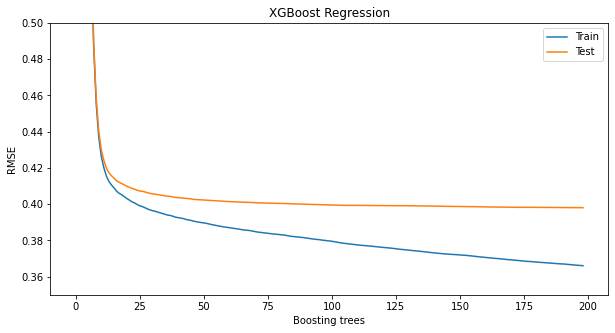

In [70]:
fselec.xgboost_learning_curve(cv_results_f, 
                              train_label='train-rmse-mean',
                              test_label='test-rmse-mean',
                              std_col=['train-rmse-std', 'test-rmse-std'],
                              y_lim=[0.35, 0.5]
                             )

Although it was found the best number of rounds, as we mentioned before, it has been trained with more rounds than optimal. Therefore, before using it for predictions, it should be retrained with the good number of rounds. Since ```best num_boost_round``` was found, there is no need the early_stopping_round anymore.

In [71]:
num_boost_round = model_1.best_iteration + 1
num_boost_round

184

In [72]:
model_final = xg.train(params_final,
                       dtrain,
                       num_boost_round=num_boost_round,
                       evals=[(dtest, "Test")])

[0]	Test-rmse:2.74791
[1]	Test-rmse:1.95537
[2]	Test-rmse:1.40953
[3]	Test-rmse:1.04001
[4]	Test-rmse:0.794114
[5]	Test-rmse:0.637076
[6]	Test-rmse:0.541455
[7]	Test-rmse:0.486069
[8]	Test-rmse:0.454121
[9]	Test-rmse:0.435344
[10]	Test-rmse:0.425524
[11]	Test-rmse:0.419978
[12]	Test-rmse:0.416386
[13]	Test-rmse:0.414111
[14]	Test-rmse:0.411829
[15]	Test-rmse:0.410443
[16]	Test-rmse:0.409484
[17]	Test-rmse:0.408669
[18]	Test-rmse:0.407895
[19]	Test-rmse:0.407044
[20]	Test-rmse:0.406658
[21]	Test-rmse:0.405803
[22]	Test-rmse:0.405533
[23]	Test-rmse:0.405123
[24]	Test-rmse:0.404377
[25]	Test-rmse:0.404251
[26]	Test-rmse:0.403673
[27]	Test-rmse:0.403502
[28]	Test-rmse:0.403083
[29]	Test-rmse:0.402484
[30]	Test-rmse:0.402313
[31]	Test-rmse:0.402145
[32]	Test-rmse:0.40151
[33]	Test-rmse:0.401314
[34]	Test-rmse:0.401221
[35]	Test-rmse:0.401031
[36]	Test-rmse:0.400997
[37]	Test-rmse:0.400582
[38]	Test-rmse:0.400586
[39]	Test-rmse:0.400577
[40]	Test-rmse:0.400468
[41]	Test-rmse:0.400093
[42]	Te

In [73]:
# If we do not provide the best_ntree_limit it will use all the trees
pred_model_f_f = model_final.predict(dtest) 
pred_model_f_f

array([4.896048 , 4.0409303, 3.9564118, ..., 3.5128784, 4.1208677,
       3.6433213], dtype=float32)

In [74]:
# Compute RMSE
rmse_tuned_f_f = RMSE(y_test, pred_model_f_f)
print("Final RMSE is {:.4f}".format(rmse_tuned_f_f))

Final RMSE is 0.3941


In [133]:
np.exp(rmse_tuned_f_f)

1.483104313375277

In [134]:
#save_model("price_model_fina_02_GA_02.model")

In [27]:
save_path_name = os.path.join(path_ouput, 'price_model_fina_02_GA.pkl')
with open(save_path_name, 'wb') as f:
    pickle.dump(model_final, f, pickle.HIGHEST_PROTOCOL)

In [107]:
# The performance of the model without tunig is lower
# We gain by tuning a 4% relative uplift
print("Change in performance", rmse_tuned_f_f - rmse_2)
print("Change in %", ((rmse_tuned_f_f - rmse_2) / rmse_2) * 100)

Change in performance -0.016122295888929605
Change in % -3.9297781493198043


In [108]:
# Looking in £ units
# It was gain 1.6% realative uplif when looking in £ units
print("Change in performance £", np.exp(rmse_tuned_f_f) - np.exp(rmse_2))
print("Change in %", (np.exp(rmse_tuned_f_f) - np.exp(rmse_2))/np.exp(rmse_2) * 100)

Change in performance £ -0.02410483710704825
Change in % -1.5993027310996892


In [109]:
# The performance w.r.t the model with all the variables
# has a 1.5% relative uplift
# (remeber that we want a smaller value of the rmse)
print("Change in performance", rmse_tuned_f_f - rmse_1)
print("Change in %", ((rmse_tuned_f_f - rmse_1) / rmse_1) * 100)

Change in performance -0.0060971001918631584
Change in % -1.5233819641302064


In [110]:
# Looking in £ units
# The performance w.r.t the model with all the variables
# has a 0.6% relative uplift
print("Change in performance £", np.exp(rmse_tuned_f_f) - np.exp(rmse_1))
print("Change in %", (np.exp(rmse_tuned_f_f) - np.exp(rmse_1))/np.exp(rmse_1) * 100)

Change in performance £ -0.009070258632849715
Change in % -0.6078550595218369


In [111]:
# The performance of the XGB model has a 46% relative uplift w.r.t the base line 
print("Change in performance", rmse_tuned_f_f - rmse_baseline)
print("Change in %", ((rmse_tuned_f_f - rmse_baseline) / rmse_baseline) * 100)

Change in performance -0.3363336752710083
Change in % -46.04339399673466


In [112]:
# Looking in £ units
# The performance of the XGB model has a 28.5% relative uplift w.r.t the base line
print("Change in performance £", np.exp(rmse_tuned_f_f) - np.exp(rmse_baseline))
print("Change in %", (np.exp(rmse_tuned_f_f) - np.exp(rmse_baseline))/np.exp(rmse_baseline) * 100)

Change in performance £ -0.5929540439707133
Change in % -28.561530646409146


In [129]:
# set importance type to gain rather than default 'split'
clf_f_f.set_params(importance_type='gain')

XGBRegressor(colsample_bytree=1.0, eval_metric='rmse', max_depth=5,
             n_estimators=184, objective='reg:squarederror', reg_lambda=20,
             subsample=1.0)

In [130]:
clf_f_f.fit(X_train[list_var_GA], y_train)

XGBRegressor(colsample_bytree=1.0, eval_metric='rmse', max_depth=5,
             n_estimators=184, objective='reg:squarederror', reg_lambda=20,
             subsample=1.0)

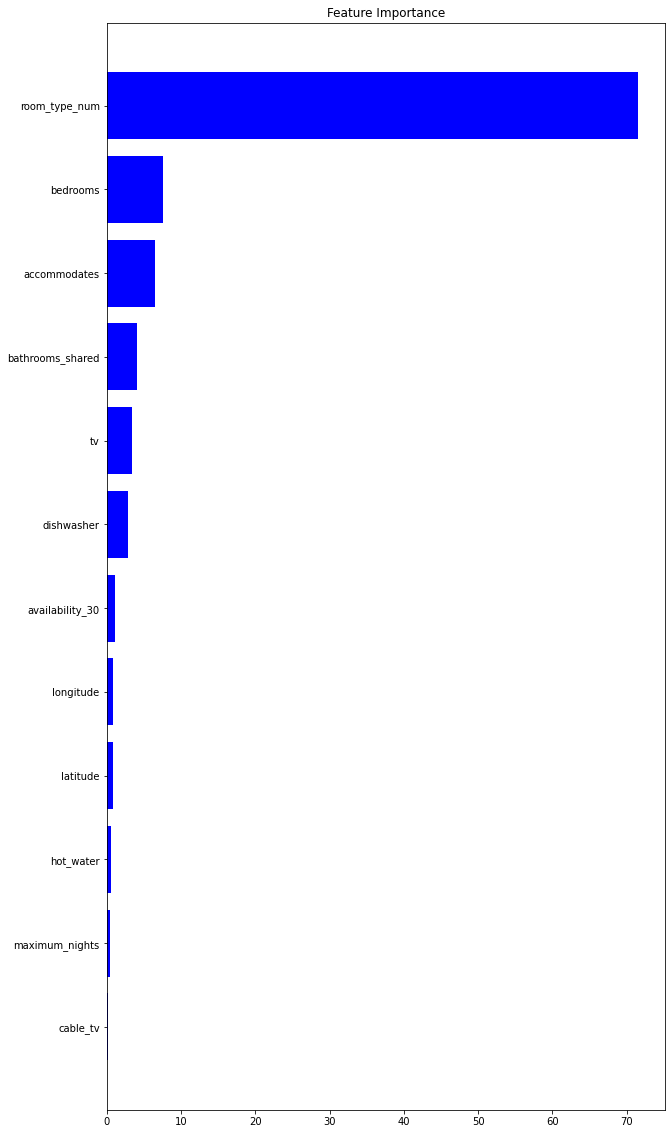

In [131]:
df_feat_import_f_f = fselec.feature_importance(clf_f_f, model_type='Uncalibrated', feature_list=list_var_GA)

In [132]:
df_feat_import_f_f

,Feature_importance%
room_type_num,71.541931
bedrooms,7.528047
accommodates,6.514672
bathrooms_shared,4.043593
tv,3.436185
dishwasher,2.866000
availability_30,1.106085
longitude,0.873748
latitude,0.860276
hot_water,0.540220


# Prediction price for th whole data set

In [113]:
# Predict all the preices in the data set
all_data = xg.DMatrix(df[list_var_GA])

In [114]:
pred_model_all = model_final.predict(all_data) 

In [115]:
# Price is in log scale so we need to convert it back
df_c = df.copy()

In [116]:
df_c['predicted_price_log_01_GA'] = pred_model_all

In [117]:
df_c['predicted_price_01_GA'] = np.exp(pred_model_all)

In [119]:
df_c[['price_log', 'predicted_price_log_01_GA']].describe()

,price_log,predicted_price_log_01_GA
count,76114.000000,76114.000000
mean,4.327777,4.328021
std,0.732286,0.614473
min,2.397895,2.697338
25%,3.761200,3.798613
50%,4.317488,4.326518
75%,4.820282,4.792853
max,6.395262,6.383001


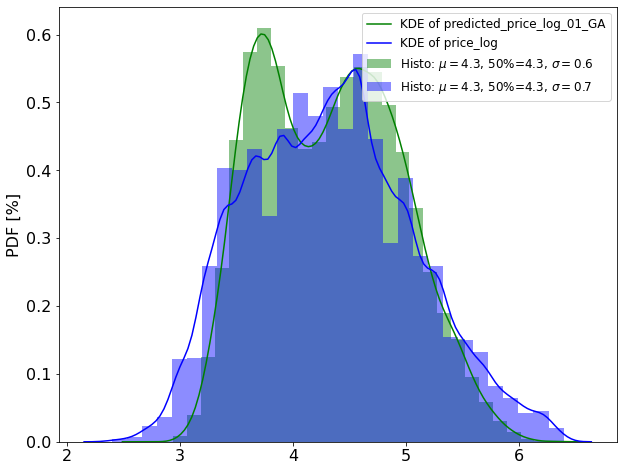

In [125]:
fig, ax = plt.subplots(figsize=(10,8))
mtool.plotting_one_kde(df_c, 'predicted_price_log_01_GA', ax=ax, color='g')
mtool.plotting_one_kde(df_c, 'price_log', ax=ax, color='b')
None

In [130]:
mtool.stats_summary(df_c[['price_log', 'predicted_price_log_01_GA']]).T

,price_log,predicted_price_log_01_GA
count,76114.000000,76114.000000
mean,4.327777,4.328021
std,0.732286,0.614473
min,2.397895,2.697338
25%,3.761200,3.798613
50%,4.317488,4.326518
75%,4.820282,4.792853
max,6.395262,6.383001
median,4.317488,4.326518
skew,0.238069,0.207438


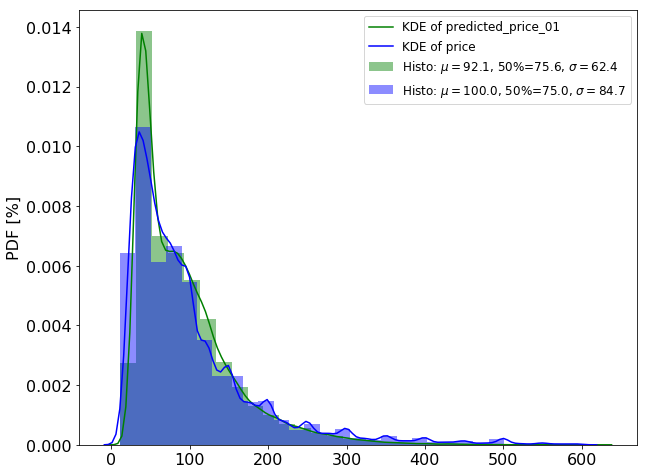

In [629]:
fig, ax = plt.subplots(figsize=(10,8))
mtool.plotting_one_kde(df_c, 'predicted_price_01', ax=ax, color='g')
mtool.plotting_one_kde(df_c, 'price', ax=ax, color='b')
None

In [34]:
mtool.stats_summary(df_c[['price', 'predicted_price_01_GA']]).T

,price,predicted_price_01_GA
count,76114.000000,76114.000000
mean,100.025690,91.833229
std,84.676740,60.744526
min,11.000000,14.840177
25%,43.000000,44.639230
50%,75.000000,75.680313
75%,124.000000,120.645105
max,599.000000,591.700623
median,75.000000,75.680313
skew,2.232381,1.577807


The standard deviation of the price for the prediction is £64.4, which is smaller than the standar deviation of £ 84.7 in the listings' price. The median for both is similar and better mesure to compare since both distribuions are skewd. 

In [134]:
# df_c.to_pickle(os.path.join(path_input, 'extended_data_set_pred_01_GA.pick'))